In [19]:
import numpy
import matplotlib.pyplot as plt
import random
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


Loading my dataset in.

In [20]:
X_train = numpy.loadtxt('input.csv', delimiter= ',')
Y_train = numpy.loadtxt('labels.csv', delimiter= ',')

# apparently the delimiter separates values with the specified character
X_test = numpy.loadtxt('input_test.csv', delimiter= ',')
Y_test = numpy.loadtxt('labels_test.csv', delimiter= ',')

Reshaping the dataset based on the image size

In [21]:
# apparently the 100, 100 represents the image size which has to be 100px x 100px (expected by most image gen models)
# 3 represents the 3 color channels for red green and blue (rgb values). 1 in Y represents that label is only one value 
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

# this normalises the typical rgb values like 255 to something between 0 and 1. kinda like an activation function
X_train = X_train/255
X_test = X_test/255

X_train[0,:]

array([[[0.14509804, 0.15294118, 0.09803922],
        [0.10196078, 0.09411765, 0.03529412],
        [0.13333333, 0.09803922, 0.03921569],
        ...,
        [0.22352941, 0.17254902, 0.1372549 ],
        [0.23921569, 0.18431373, 0.14901961],
        [0.25490196, 0.2       , 0.16470588]],

       [[0.17647059, 0.16862745, 0.10980392],
        [0.10980392, 0.09803922, 0.03137255],
        [0.20392157, 0.15686275, 0.09411765],
        ...,
        [0.21176471, 0.16078431, 0.1254902 ],
        [0.22352941, 0.16862745, 0.13333333],
        [0.23921569, 0.18431373, 0.14901961]],

       [[0.20392157, 0.17647059, 0.10196078],
        [0.1254902 , 0.09411765, 0.01960784],
        [0.27058824, 0.21176471, 0.1372549 ],
        ...,
        [0.21176471, 0.15686275, 0.11372549],
        [0.21960784, 0.16470588, 0.12156863],
        [0.23137255, 0.17647059, 0.13333333]],

       ...,

       [[0.07843137, 0.15294118, 0.        ],
        [0.39607843, 0.49019608, 0.2627451 ],
        [0.59607843, 0

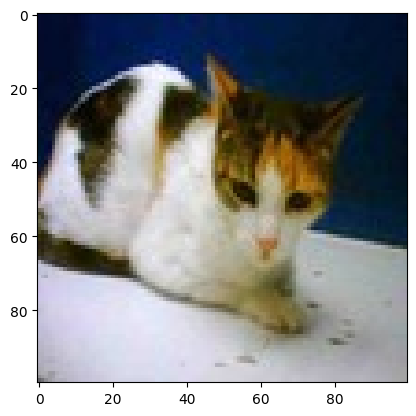

In [26]:
id = random.randint(0, len(X_train))
plt.imshow(X_train[id,:])
plt.show()

The Model!

In [27]:
# Sequential basically sequences the layers for example: Convolutional layer -> Pooling layer -> Connected layers (neural network)
model = Sequential()

# 32 is the number of filters we use and 3x3 is the size of the filter. the rest u already know
model.add(Conv2D(32, (3,3) ,activation="relu", input_shape = (100, 100, 3) ))

# For max pooling u just mention the size. You could technicially mention stride but if u dont itll use the default value. I dont think stride is necessary here
model.add(MaxPooling2D(2,2))

# input shape is only required for the first layer
model.add(Conv2D(32, (3,3) ,activation="relu"))
model.add(MaxPooling2D(2,2))

# flatten converts a multidimensional vector to a one dimensional vector
model.add(Flatten())

# dense creates a neuron layer  and the first paremeter in this case 64 defines the total number of neurons and u know what activation is
model.add(Dense(64, activation="relu" ))

# The total number of neurons in the output layer should be equal to the total number of output classes but this is binary classification so only 1 is required.
# So if its a 0 its a cat and if its a 1 its a dog
# Sigmoid is a better choice than relu when it comes to binary classification
model.add(Dense(1, activation="sigmoid" ))

C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Binary cross entropy (depends on the type of our application):

Binary Cross Entropy, also known as log loss, is a common loss function used in binary classification tasks. It measures the difference between two probability distributions: the predicted probabilities and the actual binary labels (0 or 1).

Here's how it works:

Prediction: The model outputs a probability 
p for each instance belonging to class 1 (the positive class). Since it's binary classification, there are only two classes (0 and 1), so the probability of belonging to class 0 is 
1−p

Adam:
optimises the loss function using gradient descent 

In [28]:
# without compile everytime u fit the model itll redo it
model.compile(loss= 'binary_crossentropy', optimizer= "adam", metrics= ['accuracy'])

In [ ]:
# fit passes the input data into the model and iterates over the entire model 10 times (epochs or iterations). 
# the model is divided in fit into smaller subsets with 64 samples each. ITLL ONLY UPDATE THE WEIGHTS AND BIASES AFTER COMPLETING A BATCH
model.fit(X_train, Y_train, epochs= 10, batch_size=64)